In [1]:
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import os

In [4]:
import pandas as pd

In [5]:
%matplotlib inline

In [6]:
movies=pd.read_csv('Movie-Ratings.csv')

In [7]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [8]:
movies.columns=['Film', 'Genre', 'CriticRatings', 'AudienceRatings',
       'BudgetMillions', 'Year']

In [9]:
movies.columns

Index(['Film', 'Genre', 'CriticRatings', 'AudienceRatings', 'BudgetMillions',
       'Year'],
      dtype='object')

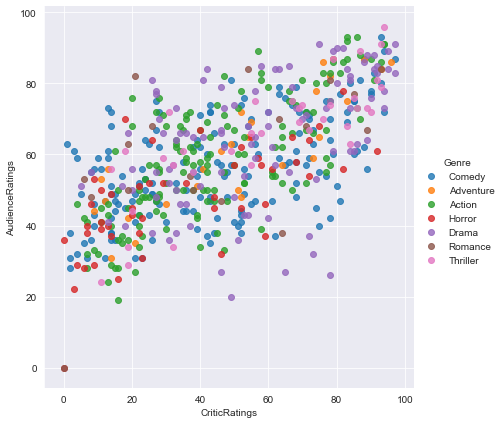

In [50]:
vis1= sns.lmplot(data=movies,x='CriticRatings', y='AudienceRatings', fit_reg=False,hue='Genre',size=6,aspect=1)
import warnings
warnings.filterwarnings('ignore')
plt.show()

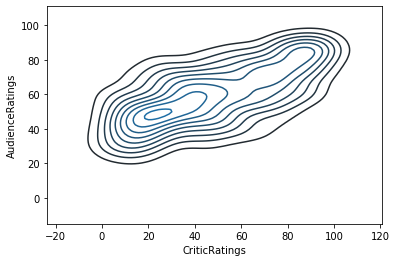

In [11]:
##in order to analyse,somtimes we hv to take much efforts in sns, but we can always look for seaborn gallery for differ.fn
#kde plot 
k1=sns.kdeplot(movies.CriticRatings, movies.AudienceRatings)

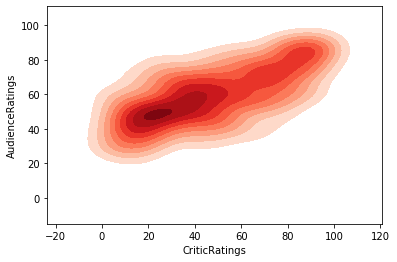

In [12]:
#lets style our plot
k1=sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,shade=True,shade_lowest=False, cmap='Reds',)
#shade is used to create shades, and if u want to see grid use shade_lowest=False

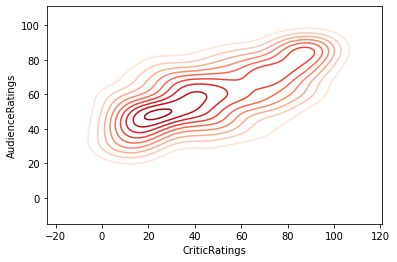

In [13]:
#this looks bit rough,no sharp lines
k2= sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds')

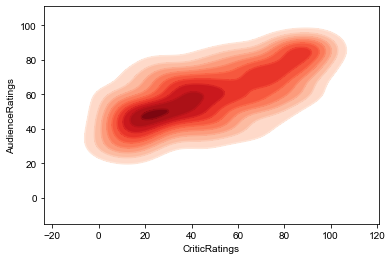

In [14]:
##now u get lines,lets combine two 
k1=sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,shade=True,shade_lowest=False, cmap='Reds')
k2= sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds')
sns.set_style("darkgrid")

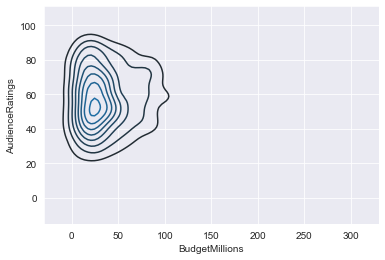

In [16]:
###WORKING WOTH SUBPLOTS()
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings)

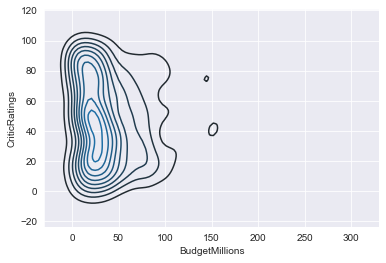

In [17]:
##the plot shows realtion btwn budger and AR,if we geometriclly sliceplot at AU=40,we see BM is dwnlod locatn, AU=60,its 
#stretched.in other way,if we slice at BM=40,AR ranges from 20-100. BM=60,70 AR is less likely to get for AR=20-30 & AR=90-100
#now lets see for CR
k1= sns.kdeplot(movies.BudgetMillions, movies.CriticRatings)

In [18]:
#@ BM=20-30,CR ranges from 0-115. ar BM>50millions, max.of CR decreases substantially. sobasically,take different slices,analyse

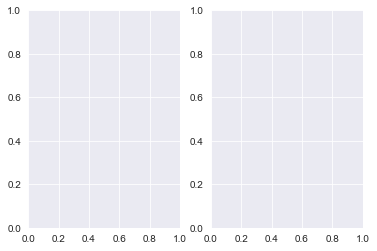

In [19]:
## SUBPLOT()-following coding convention will see mny times in python 
f, ax= plt.subplots(1,2)   #row=1,col=2

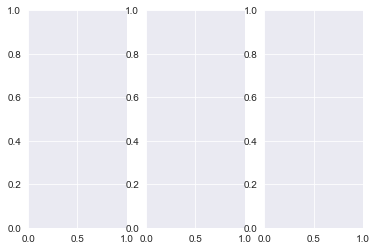

In [20]:
f,ax=plt.subplots(1,3)      #1 row,3 cols. 3 empty charts

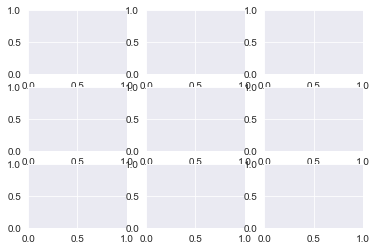

In [21]:
f,ax=plt.subplots(3,3)   #9 empty charts

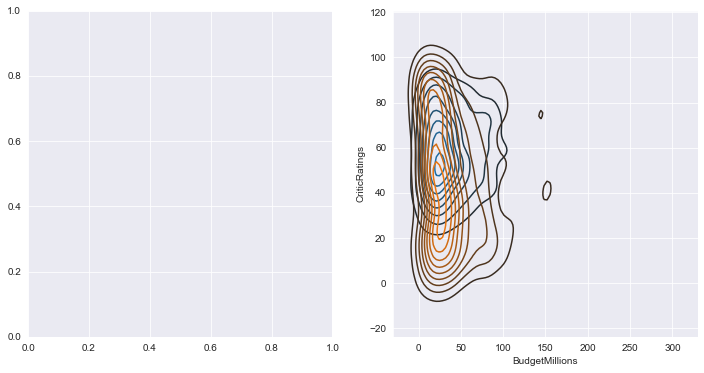

In [23]:
##lets use 2 empty cahrts,and add 2 above plots,and style it
f,ax=plt.subplots(1,2,figsize=(12,6))  #size in tuples,
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings)
k1= sns.kdeplot(movies.BudgetMillions, movies.CriticRatings)

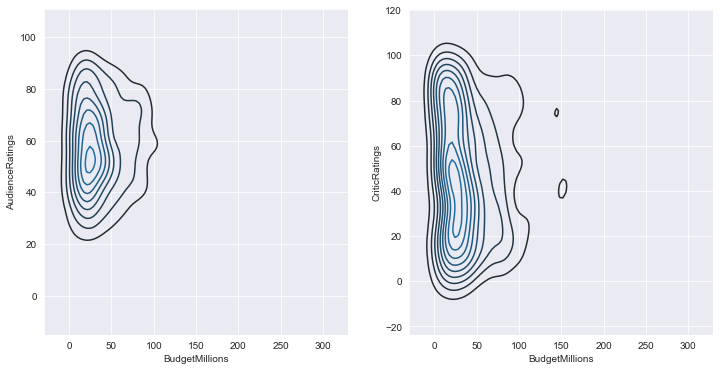

In [28]:
##above,we get 2 plots in the same graph,so how to control?#lets understand the function, f=fig, ax=axes. if u read info given 
#so fn returns to 2 valuesi.e f=whole figure,the object we r wrking with & ax=axes,an array how to access them
f,axes=plt.subplots(1,2,figsize=(12,6))
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=axes[0])
k1= sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=axes[1])

In [29]:
#if we see axes fn,1st bit is for 1stplot,2nd bit for 2 plot
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000E6ACDE20C8>,
      dtype=object)

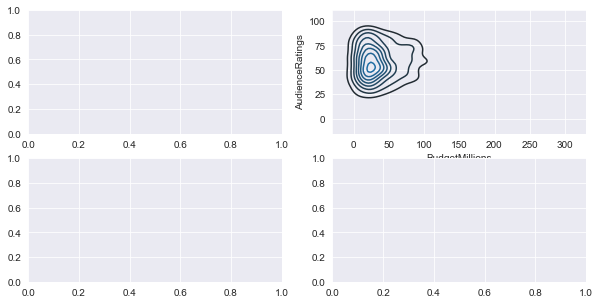

In [34]:
##now suppose,we hv 2x2 matrix of charts,then above code will give error,so specify exact location for particular chart
f,ax=plt.subplots(2,2,figsize=(10,5))
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=ax[0,1])

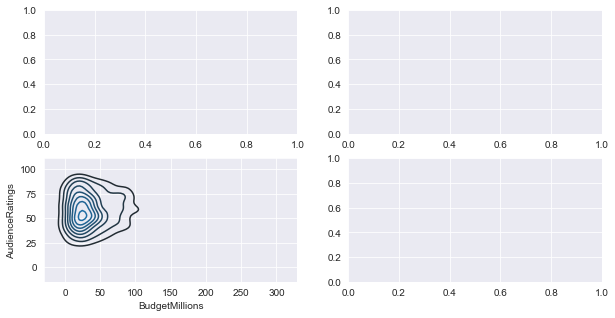

In [36]:
#to change position in 2x2 matrix
f,ax=plt.subplots(2,2,figsize=(10,5))
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=ax[1,0])

[(-20, 160)]

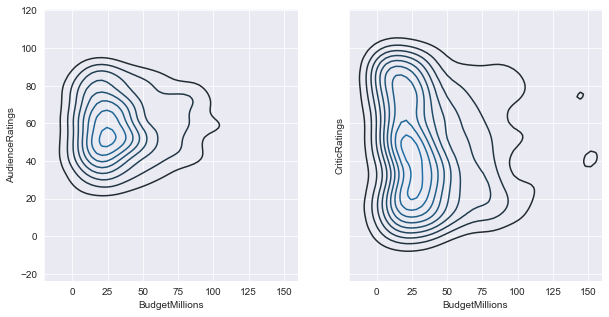

In [39]:
##style them,bcz their x,y ranges are different
f,axes=plt.subplots(1,2,figsize=(10,5),sharex=True, sharey=True)
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=axes[0])
k1= sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=axes[1])
k1.set(xlim=(-20,160))
#here,no need to write for both charts,will share them,so see modification in 1st line.

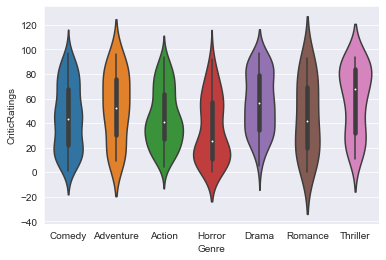

In [40]:
### VIOLIN PLOTS-Comparison with box plots
z = sns.violinplot(data=movies, x='Genre', y='CriticRatings')

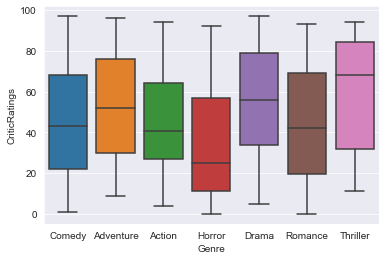

In [42]:
w = sns.boxplot(data=movies, x='Genre', y='CriticRatings')

In [43]:
##MEANING OF BOxPLOT- small bottom horizontal line-1st quartile,1st box-Q2(line is median),then Q3 and only hori.line is Q4
#box plot says,medians are differ.for differ,genre types i.e for comdedy median=40 for CR.so median is lowest for horror, 
#greatest for thriller,conclusion:if u r to make movie with avg.budget considering other factors,make it thriller based..

#DIFFERENCE-In boxplt,data is divided into quartiles(in 25%each).ex-in action type,Q2<Q3, means in Q2 large no.of points r there
#this we can undrstand but cnt visually see in box,but SEEN in VIOLIN plots,lower part is more bulged than upper

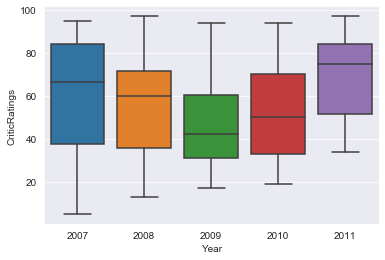

In [45]:
##MICRO-COMPARISION: lets subset and observe
w = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRatings')

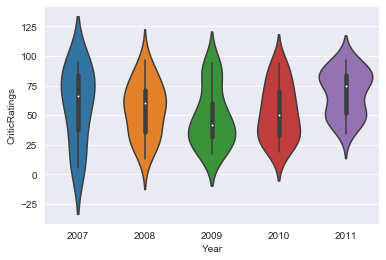

In [49]:
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRatings')

In [51]:
## If we compare 2008 & 2011, boxplot looks same,but violin plot shows concentration of point above n below median

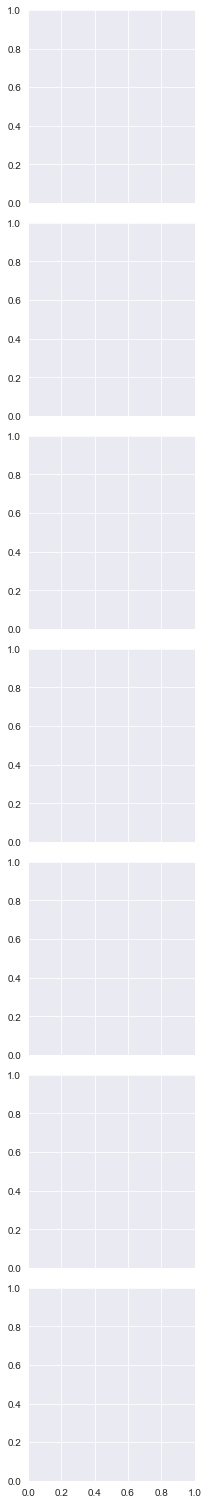

In [52]:
### CREATEING A FACET GRID:
#In the very 1st viz.we created scatter plot,diffe genre in same chart,its bit cumbersome.(it is for rough overall dnsity trend)
#So,lets split up this chart in multiple genre separately,it is very simple code
g = sns.FacetGrid(data=movies, row='Genre', hue='Genre')

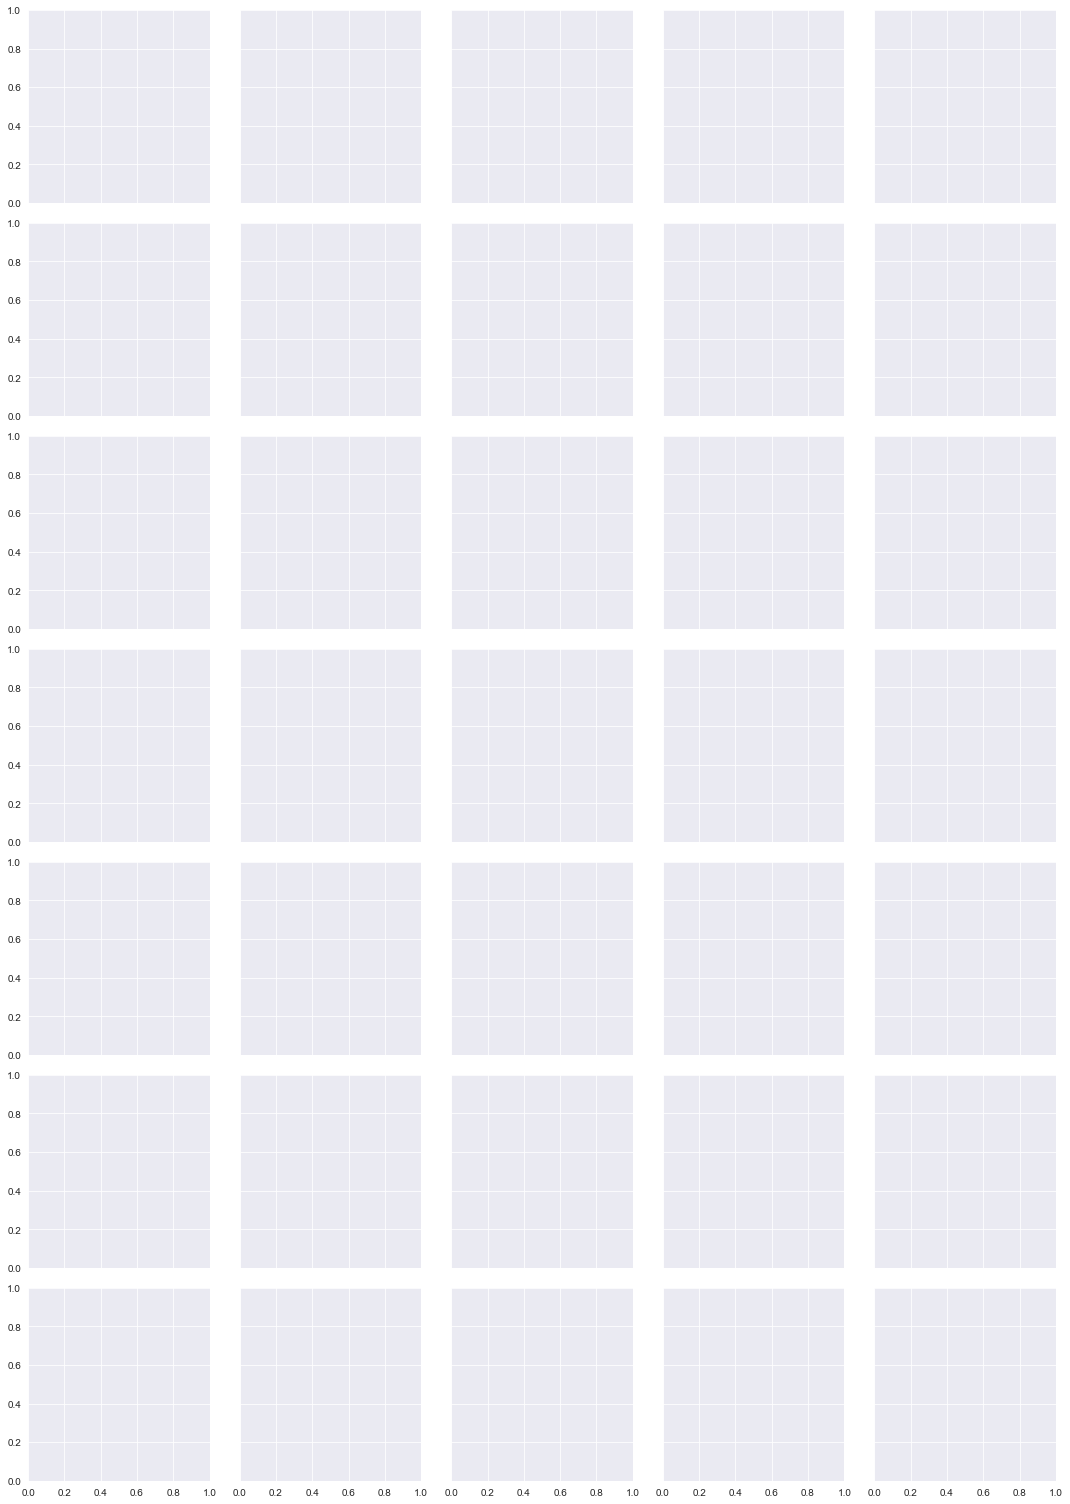

In [53]:
#lets populate this,this will not populate separately,but will create a big facet grid,and then fill it
g=sns.FacetGrid(data=movies, row='Genre', col='Year', hue='Genre')

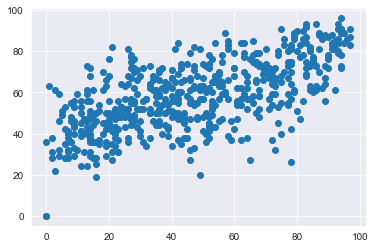

In [54]:
#how do we create scatterplot?
plt.scatter(movies.CriticRatings, movies.AudienceRatings)

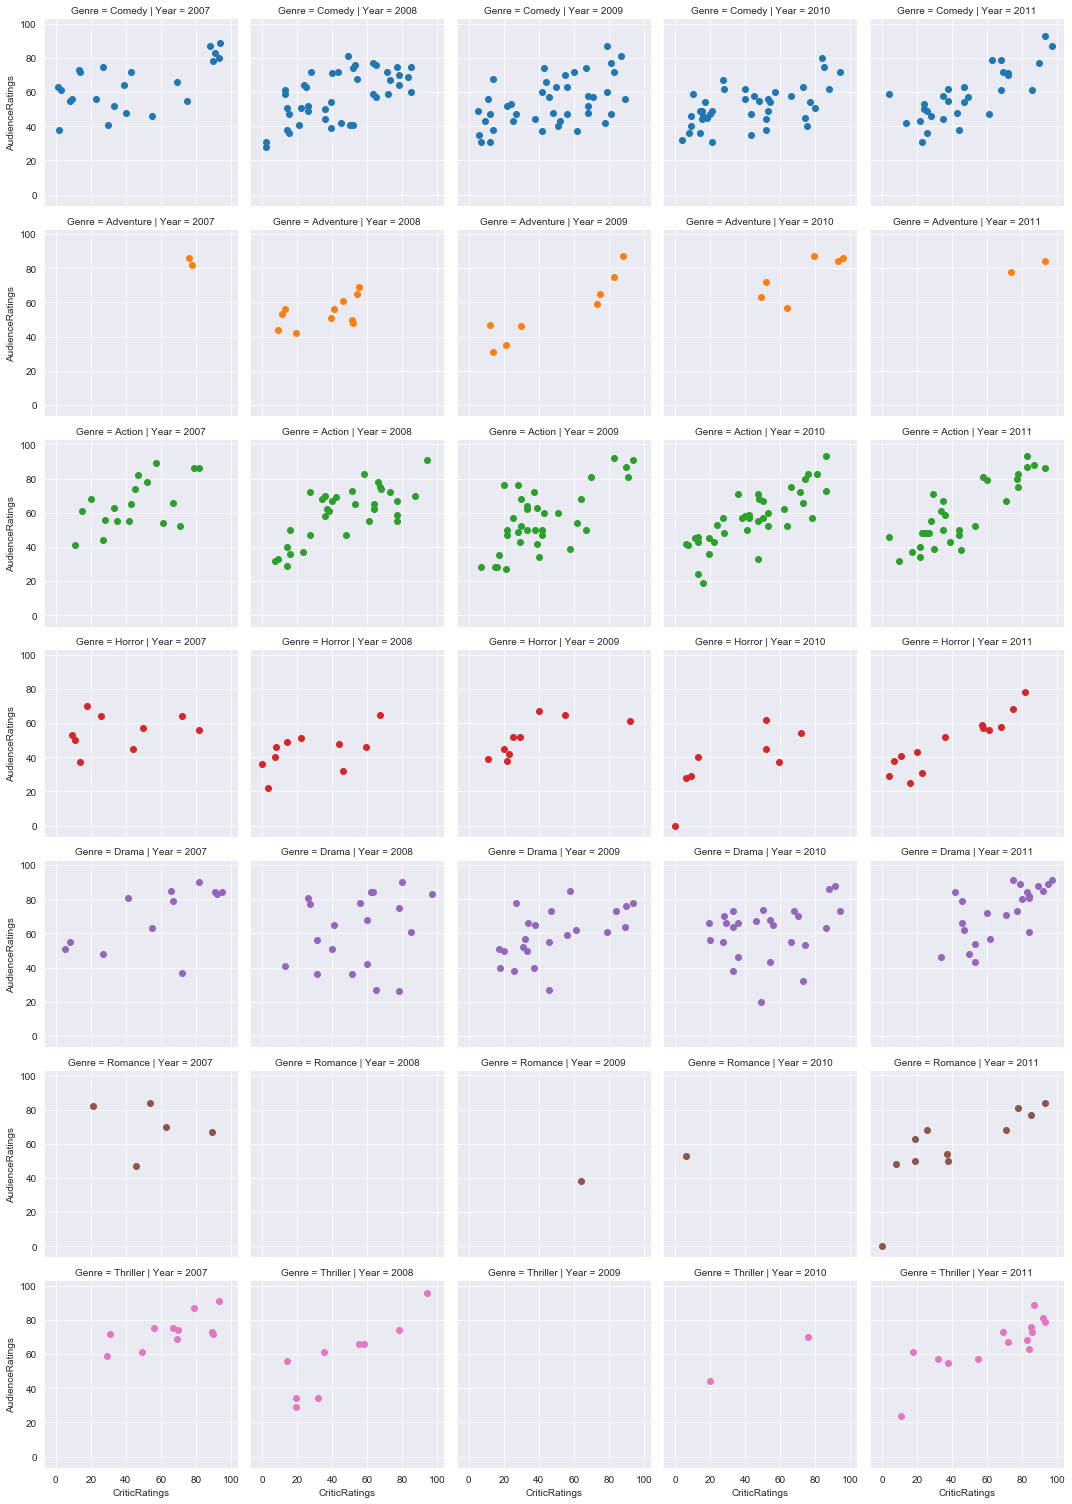

In [56]:
#now lets split this into gerne types. now we want to map this scatter fn in our facet grid(just by passing above construct)
#g = g.map(func, *args, **kwargs)-so we r passing fn=plt.scatter, *args=map fn doesnt know how many arg.r there,pass 2 args here
#and this should be passed along with facet grid. ull notice,no need to specify movies.AU or movies.CR,
#bcz alrdy its in facet grid,just write in ''
g=sns.FacetGrid(data=movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRatings', 'AudienceRatings')

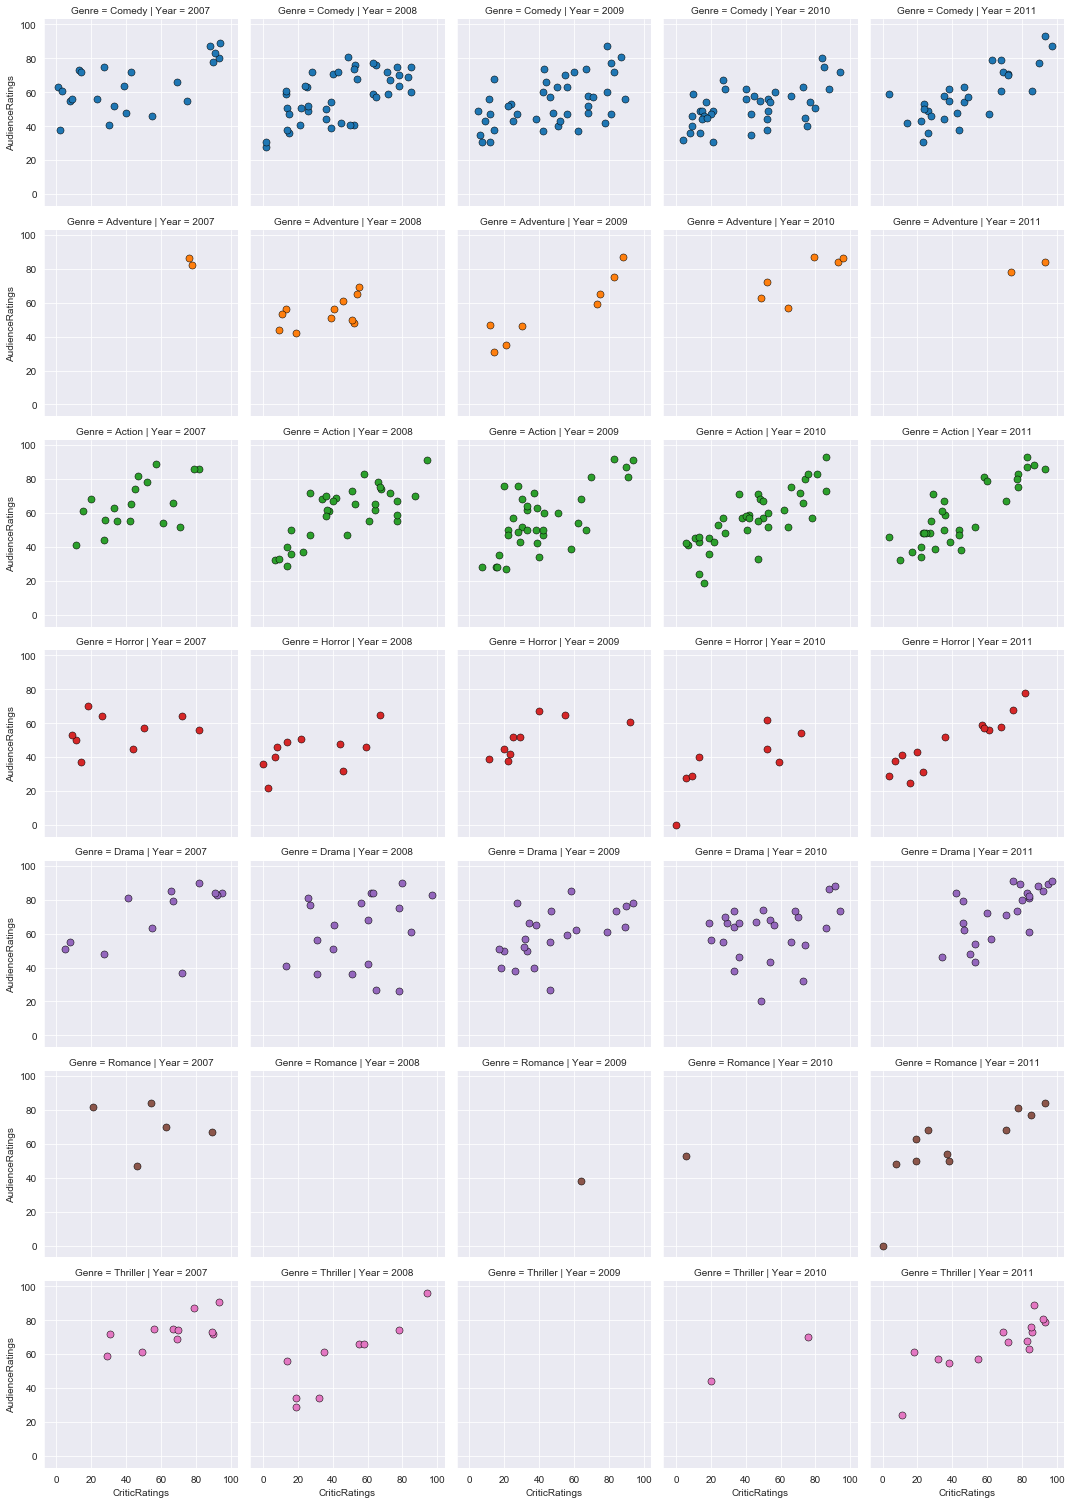

In [69]:
##Lets understand,kws,its a dict.
g = sns.FacetGrid(data=movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRatings', 'AudienceRatings', **kws)
kws=dict(s=50, linewidth=0.5, edgecolor='black')


In [68]:
kws

{'s': 50, 'linewidth': 0.5, 'edgecolor': 'black'}

In [7]:
##If we run,kws(keywords)-it show a dictionary with key and values. order is immaterial remember.
#kws-u can see these scatter points are more pronounced,even if they are overlapped they r identified.